In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [101]:
import math


class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id

        self.g=np.array([0.,-9.8])
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a

        self.lz= np.cross(self.r,self.p)

        self.ek= 0.5*self.m*np.dot(self.v,self.v)

        self.ep= self.m*9.8*self.r[1]
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)

        self.Lz=  np.zeros(len(t))


        self.VEk = np.zeros(len(t))

        self.Up= np.zeros(len(t))
    

        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetFuerza(i)
        
        self.a = self.g
        
        # Euler
  #      self.r += self.dt*self.v
  #      self.v += self.dt*self.a
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v

        #self.p += self.m*self.v
        #self.lz += np.cross(self.r,self.p)
        #self.ep += self.m*9.8*self.r[1]
        #self.ek+= 0.5*self.m*np.dot(self.v,self.v)

        
        
    def CalculateForce(self):
        
          
        self.f = self.m*self.g
            # Falta implementar energía potencial 
            
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f= self.m*self.g
        self.a= self.g
        self.ep= self.r[0]*self.m*9.8

    
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
        self.Up[i]= self.m*9.8*self.r[1]

    def SetFuerza(self,i):
        self.F[i] = self.m*self.g
        
    
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        self.Lz[i]= np.cross(self.r,(self.m*self.v))
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetForce(self,scale=1):
        return self.F[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetAngularMomentum(self,scale=1):
        return self.Lz[::scale]
    
    def GetPotentialEnergy(self,scale=1):
        return self.Up[::scale] 
    
    # Debes agregar las paredes en este punto
    def CheckLimits(self):
        
        for i in range(2):
            
            if self.r[i] + self.radius > 20 and self.v[i] > 0.:
                self.v[i] = -self.v[i]*0.9
            elif self.r[i] - self.radius < -20 and self.v[i] < 0.:
                self.v[i] = -self.v[i]*0.9

In [102]:
def GetParticles(N,t):
    
    r0 = np.array([-15.,10.])
    v0 = np.array([2.,0])
    a0 = np.array([0.,0.])
  
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
 
    Particles = [p0]
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [103]:
dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
Particles = GetParticles(1,t)

In [104]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):

            Particles[i].CalculateForce()
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            Particles[i].CheckLimits()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [105]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 30000/30000 [00:05<00:00, 5809.52 Steps/s]


In [106]:
# Bajamos dimensión de la simulacion
scale = 100
t1 = t[::scale]

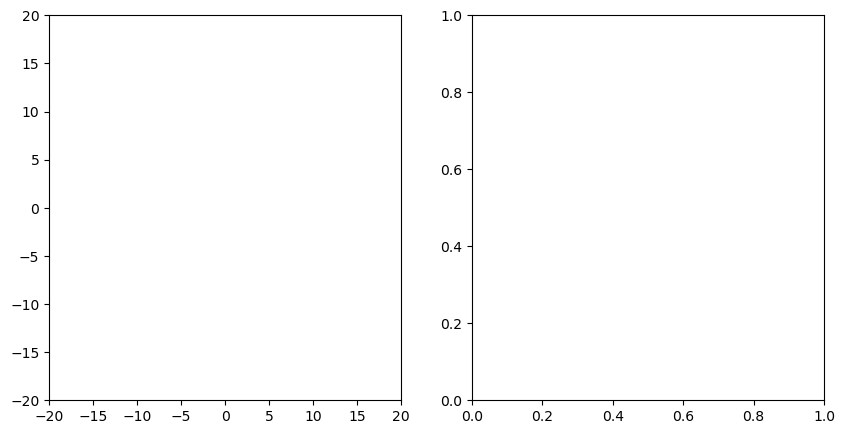

In [107]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [108]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('Esfera.mp4', writer=writer_)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [109]:

MomentumT = Particles[0].GetMomentum(scale)

AngularMomentumT = Particles[0].GetAngularMomentum(scale)

EnergyT = Particles[0].GetKineticEnergy(scale)

EnergyP = Particles[0].GetPotentialEnergy(scale)

Force = Particles[0].GetForce(scale)

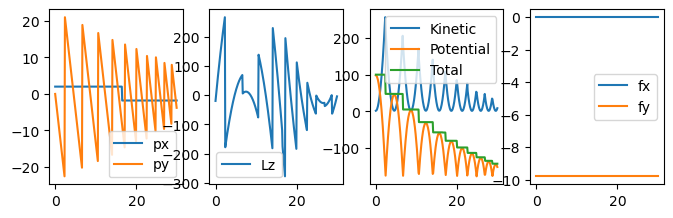

In [112]:


fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(251)
ax4 = fig3.add_subplot(252)
ax5 = fig3.add_subplot(253)
ax6 = fig3.add_subplot(254)

ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax6.plot(t1,Force[:,0],label='fx')
ax6.plot(t1,Force[:,   1],label='fy')
ax4.plot(t1,AngularMomentumT,label='Lz')
ax5.plot(t1,EnergyT,label='Kinetic')
ax5.plot(t1,EnergyP,label='Potential')
ax5.plot(t1,EnergyT+EnergyP,label='Total')
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

plt.show()